In [1]:
#some generic imports

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
from scipy import stats
from scipy import special


In [2]:
pd.__version__

'1.3.5'

### Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. The basic method to create a Series is to call:

```Python
s = pd.Series(data, index=index)
```

Here, `data` can be many different things:

 - a Python dict
 - a python list
 - an ndarray
 - a scalar value (like 5)

The passed index is a list of axis labels. Thus, this separates into a few cases depending on what **data** is:

##### from list

In [3]:
a = pd.Series(['1','2','3'], range(3))
a

0    1
1    2
2    3
dtype: object

##### from Numpy arrays

In [6]:
s = pd.Series(np.random.randn(5), index=["a", "a", "c", "d", "e"]) #note the non-unique indices
s

a   -1.207815
a    1.723647
c   -1.290780
d   -0.844811
e    0.047745
dtype: float64

In [7]:
s.index

Index(['a', 'a', 'c', 'd', 'e'], dtype='object')

pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time.

##### from dictionary

In [8]:
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

`Series` index will be ordered by the dict’s insertion order, if you’re using Python version >= 3.6 and pandas version >= 0.23.

If you’re using Python < 3.6 or pandas < 0.23, and an index is not passed, the `Series` index will be the lexically ordered list of dict keys.

If an index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [10]:
pd.Series(d, index = list('cab'))

c    2
a    0
b    1
dtype: int64

##### from scalar value

In [12]:
#if data is scalar (here 5), index must be provided
data = pd.Series(5, index = ['a','b','c','d']) 
data

a    5
b    5
c    5
d    5
dtype: int64

#### Series is ndarray-like

Series acts very similarly to a ndarray, and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [15]:
s

a   -1.207815
a    1.723647
c   -1.290780
d   -0.844811
e    0.047745
dtype: float64

In [16]:
s[0]

-1.2078146616033723

In [17]:
s[:3]

a   -1.207815
a    1.723647
c   -1.290780
dtype: float64

In [18]:
s[s > s.median()]

a    1.723647
e    0.047745
dtype: float64

In [19]:
s[[4, 3, 1]]

e    0.047745
d   -0.844811
a    1.723647
dtype: float64

In [20]:
np.exp(s)


a    0.298850
a    5.604933
c    0.275056
d    0.429639
e    1.048904
dtype: float64

If you need the actual array backing a `Series`, use `Series.array`.

In [21]:
s.array

<PandasArray>
[-1.2078146616033723,  1.7236471766350312, -1.2907800149176076,
 -0.8448107009094705, 0.04774535625910334]
Length: 5, dtype: float64

Accessing the array like above can be useful when you need to do some operation without the index (to disable automatic alignment, for example)

While Series is ndarray-like, if you need an actual ndarray, then use `Series.to_numpy()`.

In [25]:
s.to_numpy()

array([-1.20781466,  1.72364718, -1.29078001, -0.8448107 ,  0.04774536])

##### Attribute access

You may access an index on a `Series` or column on a `DataFrame` directly as an attribute:

In [27]:
s.d

-0.8448107009094705

In [31]:
axa = pd.Series([1,2], index = ['foo','bar'])
axa.foo

1

$\color{blue}{Careful!} $



 - You can use this access only if the index element is a valid Python identifier, e.g. `s.1` is not allowed.

 - The attribute will not be available if it conflicts with an existing method name, e.g. `s.min` is not allowed, but `s['min']` is possible.

 - Similarly, the attribute will not be available if it conflicts with any of the following list: `index`, `major_axis`, `minor_axis`, `items`.

 - In any of these cases, standard indexing will still work, e.g. `s['1']`, `s['min']`, and `s['index']` will access the corresponding element or column.


##### Series is dict-like

A Series is like a fixed-size dict in that you can get and set values by index label:

In [32]:
s['a']

a   -1.207815
a    1.723647
dtype: float64

In [34]:
s['f'] = 0.1234
s

a   -1.207815
a    1.723647
c   -1.290780
d   -0.844811
e    0.047745
f    0.123400
dtype: float64

In [35]:
"f" in s, "g" in s

(True, False)

Using the `get` method, a missing label will return `None` or specified default:

In [37]:
s.get("g")

In [38]:
s.get("g", np.nan)

nan

In [63]:
s.keys()

Index(['a', 'a', 'c', 'd', 'e', 'f'], dtype='object')

In [65]:
s.values

array([-1.20781466,  1.72364718, -1.29078001, -0.8448107 ,  0.04774536,
        0.1234    ])

##### Iteration over Series

In [66]:
for i in s:
    print(i)

-1.2078146616033723
1.7236471766350312
-1.2907800149176076
-0.8448107009094705
0.04774535625910334
0.1234


##### Vectorized operations and label alignment with Series

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [39]:
s[1:] + s[:-1]

a    0.515833
a    3.447294
c   -2.581560
d   -1.689621
e    0.095491
f         NaN
dtype: float64

The result of an operation between unaligned Series will have the **union** of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing `NaN`. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research.

##### `name` attribute


In [41]:
s.name = 'Foo'
s.name

'Foo'

You can rename a Series with the `pandas.Series.rename()` method.

In [42]:
s1 = s.rename('Bar')
s1.name

'Bar'

Note that `s1` and `s` are different objects.

##### `Series.to_frame()` method

In [43]:
s.to_frame()

,Foo
a,-1.207815
a,1.723647
c,-1.290780
d,-0.844811
e,0.047745
f,0.123400


##### `Series.astype()` method

In [44]:
s2= pd.Series(range(1,4), index = list('abc') )
s2

a    1
b    2
c    3
dtype: int64

In [45]:
s2.astype('float')

a    1.0
b    2.0
c    3.0
dtype: float64

### DataFrame

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. Like Series, DataFrame accepts many different kinds of input:

 - Dict of 1D ndarrays, lists, dicts, or Series

 - 2-D numpy.ndarray

 - Structured or record ndarray

 - A Series

 - Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

##### From NumPy arrays


In [67]:
np.random.seed(123)
data = np.random.randn(3,4)

data = pd.DataFrame(data, columns = "P Q R S".split())
data

,P,Q,R,S
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709


##### From dict of Series or dicts

In [48]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

df = pd.DataFrame(d)
df


,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [49]:
pd.DataFrame(d, index=["d", "b", "a"]) #note the absence of 'c' index and its respective elements

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [50]:
pd.DataFrame(d, columns=["two", "three"]) #notice the absence of 'one' column and presence of 'three' column 

,two,three
a,1.0,NaN
b,2.0,NaN
c,3.0,NaN
d,4.0,NaN


In [51]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [52]:
df.columns

Index(['one', 'two'], dtype='object')

##### From dict of ndarrays / lists

The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be `range(n)`, where `n` is the array length.

In [53]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [54]:
pd.DataFrame(d, index = list('abcd'))

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


##### From structured or record array

This case is handled identically to a dict of arrays.

In [56]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])

data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]

pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [57]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [58]:
pd.DataFrame(data, columns=list('CAB'))

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


#### From a list of dicts

In [59]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]

pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [60]:

pd.DataFrame(data2, index=["first", "second"], columns = ["b", "c"])

,b,c
first,2,NaN
second,10,20.0


##### From dictionary with keys as dictionaries

In [68]:
age = {'sam': 33, 'mac':37}
address = {'sam':100, 'mac':101}
df = pd.DataFrame({'a':age, 'b':address})
df

,a,b
sam,33,100
mac,37,101


##### From a dict of tuples

You can automatically create a MultiIndexed frame by passing a tuples dictionary.

In [61]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

#####  From a Series

The result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided).

In [62]:
s3 = pd.Series([2,3,4], index = list('abc'))
s3.name = 'Series'

pd.DataFrame(s3)

,Series
a,2
b,3
c,4


for dataframe 

You can use attribute access to modify an existing element of a Series or column of a DataFrame, but be careful; if you try to use attribute access to create a new column, it creates a new attribute rather than a new column. In 0.21.0 and later, this will raise a UserWarning:

#### Alternate Constructors

`DataFrame.from_dict`

`DataFrame.from_dict` takes a dict of dicts or a dict of array-like sequences and returns a DataFrame. It operates like the `DataFrame` constructor except for the `orient` parameter which is `columns` by default, but which can be set to `index` in order to use the dict keys as row labels.

In [69]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [70]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


`DataFrame.from_records`

`DataFrame.from_records` takes a list of tuples or an ndarray with structured dtype. It works analogously to the normal `DataFrame` constructor, except that the resulting `DataFrame` index may be a specific field of the structured dtype. For example:

In [71]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [72]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


#### Column selection, addition, deletion

You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [74]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
df = pd.DataFrame(d)

df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [75]:
df["three"] = df["one"] * df["two"]

In [76]:
df["flag"] = df["one"] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


Columns can be deleted or popped like with a dict:

In [79]:
del df["two"]
three = df.pop("three")

In [80]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [81]:
three

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

When inserting a scalar value, it will naturally be propagated to fill the column:

In [82]:
df["foo"] = "bar"

In [83]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index:

In [84]:
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame’s index.

By default, columns get inserted at the end. The `insert` function is available to insert at a particular location in the columns:

In [85]:
df.insert(1, "bar", df["one"])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


#### `assign` method

`assign` always returns a copy of the data, leaving the original DataFrame untouched.

In [3]:
df = pd.DataFrame({'a': list('abc'), 'b': range(1,4)})
df = df.assign(c = [2,5,4])
df

,a,b,c
0,a,1,2
1,b,2,5
2,c,3,4


In [4]:
df.assign(d = lambda x: x.b * x.c)

,a,b,c,d
0,a,1,2,2
1,b,2,5,10
2,c,3,4,12


 `assign()` method allows you to easily create new columns that are potentially derived from existing columns.

In [6]:
iris = pd.read_csv("data/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:

iris.assign(sepal_ratio=iris["sepal_width"] / iris["sepal_length"]).head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


In [10]:
iris.assign(sepal_ratio=lambda x: (x["sepal_width"] / x["sepal_length"])).head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using `assign` in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='SepalRatio', ylabel='PetalRatio'>

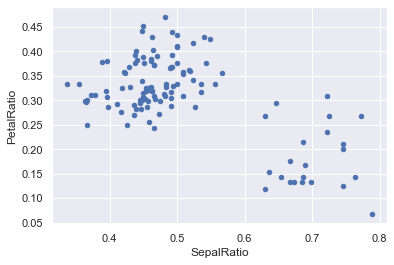

In [11]:
(
    iris.query("sepal_length > 5")
    .assign(
        SepalRatio=lambda x: x.sepal_width / x.sepal_length,
        PetalRatio=lambda x: x.petal_width / x.petal_length,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that’s been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn’t have a reference to the filtered DataFrame available.

The function signature for `assign` is simply `**kwargs`. The keys are the column names for the new fields, and the values 
are either a value to be inserted (for example, a `Series` or NumPy array), or a function of one argument to be called on the DataFrame. A copy of the original `DataFrame` is returned, with the new values inserted.

Starting with Python 3.6 the order of `**kwargs` is preserved. This allows for dependent assignment, where an expression later in `**kwargs` can refer to a column created earlier in the same `assign()`.

In [12]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


#### Data alignment and arithmatic

Data alignment between DataFrame objects automatically align on **both the columns and the index (row labels)**. Again, the resulting object will have the union of the column and row labels.

In [21]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])
df + df2

,A,B,C,D
0,0.010117,-1.398327,-1.338030,NaN
1,1.126774,1.529720,0.735906,NaN
2,-0.536913,-0.456562,-0.315493,NaN
3,-0.989671,-1.782462,1.968493,NaN
4,-2.006378,-1.935469,-0.748395,NaN
5,0.313307,-1.453482,1.300325,NaN
6,-1.027712,1.460349,-0.019346,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between DataFrame and Series, the default behavior is to align the Series **index** on the DataFrame **columns**, thus broadcasting row-wise. For example:

In [22]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-1.243020,1.871904,0.924857,1.128816
2,-0.920476,-0.662194,-0.423868,-0.299630
3,-0.991800,-0.258727,1.741475,-2.231040
4,-1.082114,0.278594,-0.008730,-1.296439
5,-0.524490,0.098848,-0.319527,0.882252
6,0.192134,1.564052,0.668209,2.014945
7,-0.924653,1.432798,0.460930,1.784230
8,0.050028,-0.256550,-0.478298,0.677983
9,1.094965,3.100106,-0.311385,-1.523975


Operations with scalars are just as you would expect:

In [24]:
(df * 5 + 2).head(3)

,A,B,C,D
0,4.287800,-4.463605,-0.473655,2.947937
1,-1.927301,4.895917,4.150629,8.592015
2,-0.314582,-7.774575,-2.592997,1.449785


Boolean operators work as well:

In [25]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [26]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [27]:
df1

,a,b
0,True,False
1,False,True
2,True,True


In [28]:
~df1

,a,b
0,False,True
1,True,False
2,False,False


To transpose, access the `T` attribute (also the `transpose` function), similar to an ndarray:

In [30]:
df[:5].T

,0,1,2,3,4
A,0.457560,-0.785460,-0.462916,-0.534240,-0.624554
B,-1.292721,0.579183,-1.954915,-1.551448,-1.014127
C,-0.494731,0.430126,-0.918599,1.246744,-0.503461
D,0.189587,1.318403,-0.110043,-2.041453,-1.106851


##### DataFrame interoperability with NumPy functions

Elementwise NumPy ufuncs (log, exp, sqrt, …) and various other NumPy functions can be used with no issues on Series and DataFrame, assuming the data within are numeric:

In [31]:
np.exp(df).head(2)

,A,B,C,D
0,1.580213,0.274523,0.609735,1.208751
1,0.455910,1.784580,1.537451,3.737448


In [33]:
np.asarray(df)[:3]

array([[ 0.45755994, -1.292721  , -0.49473094,  0.18958736],
       [-0.78546015,  0.57918334,  0.43012576,  1.31840299],
       [-0.46291632, -1.95491506, -0.91859937, -0.11004302]])

In [35]:
df[:3]

,A,B,C,D
0,0.457560,-1.292721,-0.494731,0.189587
1,-0.785460,0.579183,0.430126,1.318403
2,-0.462916,-1.954915,-0.918599,-0.110043


DataFrame is not intended to be a drop-in replacement for ndarray as its indexing semantics and data model are quite different in places from an n-dimensional array.

Series implements `__array_ufunc__`, which allows it to work with NumPy’s universal functions.

The ufunc is applied to the underlying array in a Series.

In [36]:
ser = pd.Series([1, 2, 3, 4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

Like other parts of the library, pandas will automatically align labeled inputs as part of a ufunc with multiple inputs. For example, using `numpy.remainder()` on two `Series` with differently ordered labels will align before the operation.

In [37]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])

np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

As usual, the union of the two indices is taken, and non-overlapping values are filled with missing values.

In [38]:
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

When a binary ufunc is applied to a `Series` and `Index`, the `Series` implementation takes precedence and a `Series` is returned.

In [39]:
ser = pd.Series([1, 2, 3])
idx = pd.Index([4, 5, 6])

np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

#### Console Display

Setting how much to print on a single row
    
    pd.set_option('display.width', 40) 

Setting max width of individual columns 

    pd.set_option('display.max_colwidth',30)

In [40]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Using `to_string` will return a string representation of the DataFrame in tabular form, though it won’t always fit the console width:

In [42]:
print(iris.to_string())

     sepal_length  sepal_width  petal_length  petal_width     species
0             5.1          3.5           1.4          0.2      setosa
1             4.9          3.0           1.4          0.2      setosa
2             4.7          3.2           1.3          0.2      setosa
3             4.6          3.1           1.5          0.2      setosa
4             5.0          3.6           1.4          0.2      setosa
5             5.4          3.9           1.7          0.4      setosa
6             4.6          3.4           1.4          0.3      setosa
7             5.0          3.4           1.5          0.2      setosa
8             4.4          2.9           1.4          0.2      setosa
9             4.9          3.1           1.5          0.1      setosa
10            5.4          3.7           1.5          0.2      setosa
11            4.8          3.4           1.6          0.2      setosa
12            4.8          3.0           1.4          0.1      setosa
13            4.3   

##### DataFrame column attribute access

If a DataFrame column label is a valid Python variable name, the column can be accessed like an attribute:

In [44]:
iris.sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

### Indexing and Selection

Four ways to index - 

 - `[]` subscription operator.  
 - `.` attribute operator. Used when label is valid Python identifier
 - `.loc[]` explicit indexing based on label. Raise `KeyError` if no label found
 - `iloc[]` implicit indexing based on index. Raise `IndexError` if index out of range

#### `[]`

Both index and label can be used. Boolean array also allowed. Using this for Series indexing and slicing is starightforward. In cases of DataFrames, it can take following forms  - 

Operation|Syantax|Result
---------|---------|----
Select column|``df[col]``|Series
Select column|``df[[col1, col2]]``|DataFrame
Slice Row|``df[5:10]``|DataFrame, `Stop` index exlusive
Slice Row|``df[lable1:label2]``|DataFrame, both inclusive
Select row by bool vector|``df[bool_vec``]|DataFrame

In [166]:
s =  pd.Series(range(1,10), list('abcdefghi'))
s

a    1
b    2
c    3
d    4
e    5
f    6
g    7
h    8
i    9
dtype: int64

In [167]:
s['a']

1

In [168]:
s[1]

2

You can add element to a series by using this operator. Note, however, if explicit index is provided, you can only use index label to add element. 

In [170]:
s['j'] = 10
s

a     1
b     2
c     3
d     4
e     5
f     6
g     7
h     8
i     9
j    10
dtype: int64

In above case, something like `s[10] = 11` won't work. 

In [ ]:
s[10] = 11 #error

However, if no explicit label indexing is provided, we can add element through implicit indexing

In [174]:
s1 = pd.Series([1,2])
s1[2] = 3
s1


0    1
1    2
2    3
dtype: int64

Boolean masking

In [169]:
mask = [True, True, False]*3

s[mask]

a    1
b    2
d    4
e    5
g    7
h    8
dtype: int64

In [176]:
data = np.arange(1,13).reshape(4,3)
table = pd.DataFrame(data, index = list('abcd'), columns =['foo','bar','baz'])
table

,foo,bar,baz
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12


In [177]:
table['foo'] #returns Series

a     1
b     4
c     7
d    10
Name: foo, dtype: int32

In [178]:
table[['foo']] #returns DataFrame

,foo
a,1
b,4
c,7
d,10


In [179]:
table['bar':'foo'] #this is undocumented peculiarity, ignore this 

,foo,bar,baz
c,7,8,9
d,10,11,12


In [180]:
table[['bar','foo']] #columns selection

,bar,foo
a,2,1
b,5,4
c,8,7
d,11,10


Column can also be added through using this method - 

In [182]:
table['bam'] = [22,22,22,22]
table

,foo,bar,baz,bam
a,1,2,3,22
b,4,5,6,22
c,7,8,9,22
d,10,11,12,22


In [183]:
table[1:2] #stop not inclusive

,foo,bar,baz,bam
b,4,5,6,22


In [184]:
table['a':'c'] #both inclusive

,foo,bar,baz,bam
a,1,2,3,22
b,4,5,6,22
c,7,8,9,22


In [185]:
b_arr = [True, False, True, False]

table[b_arr]

,foo,bar,baz,bam
a,1,2,3,22
c,7,8,9,22


#### `.` attribute operator

Can be used only when label is valid Python identifier. So, `df.a` is valid but `df.2` is not. Only columns can be accessed. Works for Series as well.

In [186]:
s.a

1

In [187]:
table.foo #only for column

a     1
b     4
c     7
d    10
Name: foo, dtype: int32

Note that, unlike `[]` operation `.` can't be used to add element. It will create an attribute - 

In [191]:
s.k = 'Bam bam'
s

a     1
b     2
c     3
d     4
e     5
f     6
g     7
h     8
i     9
j    10
dtype: int64

In [192]:
s.k

'Bam bam'

#### `.loc[]` 

explicit indexing based on label. Raise `KeyError` if no label found.

 - `df.loc[a]`               - row `a`, returns series
 - `df.loc[[a]]`             - row `a`, returns dataframe
 - `df.loc[a,b]`             - row `a`, column `b`
 - `df.loc[[a1,a2],[b1,b2]]` - rows `a1` and `a2`, columns `b1` and `b2`
 - `df.loc[a1:a2, b1:b2]`    -slice operation

In [132]:
s.loc['a']

1

In [133]:
s.loc['a':'c']

a    1
b    2
c    3
dtype: int64

In [134]:
s.loc['k'] #keyerror

KeyError: 'k'

In [135]:
s.loc['c':'a']

Series([], dtype: int64)

In [136]:
mask = [True, True, False]*3

s.loc[mask]

a    1
b    2
d    4
e    5
g    7
h    8
dtype: int64

In [137]:
table.loc['a'] #returns series

foo    1
bar    2
baz    3
Name: a, dtype: int32

In [138]:
table.loc[['a']] #returns dataframe

,foo,bar,baz
a,1,2,3


In [139]:
table.loc['a','bar'] # row, column

2

In [140]:
table.loc['b':'d'] #row slicing

,foo,bar,baz
b,4,5,6
c,7,8,9
d,10,11,12


In [141]:
table.loc[['c','d'],['foo', 'baz']] #rows, columns selection

,foo,baz
c,7,9
d,10,12


In [142]:
table.loc[:, 'foo':'bar']

,foo,bar
a,1,2
b,4,5
c,7,8
d,10,11


In [143]:
table.loc['b':'d', ['baz','bar']]

,baz,bar
b,6,5
c,9,8
d,12,11


In [146]:
mask1 = [True, False, True, False] #boolean array
table.loc[mask1]

,foo,bar,baz
a,1,2,3
c,7,8,9


In [147]:
col_mask = [True, False, False]
table.loc[mask1, col_mask]

,foo
a,1
c,7


$\color{blue}{Note:}$

When using `.loc` with slices, if both the start and the stop labels are present in the index, then elements located between the two (including them) are returned.

If at least one of the two is absent, but the index is sorted, and can be compared against start and stop labels, then slicing will still work as expected, by selecting labels which rank between the two.

However, if at least one of the two is absent and the index is not sorted, an error will be raised.

Also, if the index has duplicate labels and either the start or the stop label is duplicated, an error will be raised.

In [198]:
table.loc['a':'f'] #index label 'e' and 'f' are absent but indices sorted 

,foo,bar,baz,bam
a,1,2,3,22
b,4,5,6,22
c,7,8,9,22
d,10,11,12,22


In [199]:
table1 = pd.DataFrame(np.arange(1,13).reshape(4,3), index = list('bdca'))
table1

,0,1,2
b,1,2,3
d,4,5,6
c,7,8,9
a,10,11,12


In [203]:
table1.loc['b':'e'] #won't work, indices aren't sorted

KeyError: 'e'

In [206]:
table1.sort_index().loc['b':'e'] #now will work

,0,1,2
b,1,2,3
c,7,8,9
d,4,5,6


In [208]:
s2 = pd.Series(list('abcdef'), index=[0, 3, 2, 5, 4, 2])
s2.loc[2:5] #error

KeyError: 'Cannot get left slice bound for non-unique label: 2'

##### `.loc` can be used to insert a row (at the end) 

In [148]:
table.loc['e'] = [13,14,15]
table

,foo,bar,baz
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12
e,13,14,15


In [149]:
table.loc['f'] = pd.Series([16,17,18], index = table.columns)

In [150]:
table

,foo,bar,baz
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12
e,13,14,15
f,16,17,18


#### `.iloc[]`

 - `df.iloc[[2,1]]` # 2 rows with index 2 and 1
 - `df.iloc[[1,3],[0,2,3]]` # 2 rows and 3 columns
 - `df.iloc[a:b, c:d]` #row and columns slicing
 - `df.iloc[bool_arr, bool_arr1]` #only show row and col corresponding to True in boolean arrays

In [151]:
s.iloc[5]

6

In [152]:
s.iloc[2:5]

c    3
d    4
e    5
dtype: int64

In [154]:
mask

[True, True, False, True, True, False, True, True, False]

In [155]:
s.iloc[mask]

a    1
b    2
d    4
e    5
g    7
h    8
dtype: int64

In [157]:
table.iloc[1]

foo    4
bar    5
baz    6
Name: b, dtype: int64

In [158]:
table.iloc[[1]]

,foo,bar,baz
b,4,5,6


In [161]:
table.iloc[[2,1]]

,foo,bar,baz
c,7,8,9
b,4,5,6


In [159]:
table.iloc[1:4,0:2]

,foo,bar
b,4,5
c,7,8
d,10,11


In [160]:
table.iloc[:,[2,0]]

,baz,foo
a,3,1
b,6,4
c,9,7
d,12,10
e,15,13
f,18,16


In [163]:
hide_row = [True, False]*3
hide_col = [True, False,True]

table.iloc[hide_row, hide_col]


,foo,baz
a,1,3
c,7,9
e,13,15


Unlike `loc`, `iloc` can't be used to insert row. However, `iloc` can be used to modify the object. 

In [ ]:
table.iloc[6] = [19,20,21] #error

In [211]:
table.iloc[3] = 0
table

,foo,bar,baz,bam
a,1,2,3,22
b,4,5,6,22
c,7,8,9,22
d,0,0,0,0


Out of range slice indexes are handled gracefully just as in Python/NumPy. However, single indexer raises `IndexEror` -

In [212]:
table.iloc[:10]

,foo,bar,baz,bam
a,1,2,3,22
b,4,5,6,22
c,7,8,9,22
d,0,0,0,0


In [ ]:
table.iloc[6] #Index error

#### Selection by Callable

`.loc`, `.iloc`, and also `[]` indexing can accept a callable as indexer. The callable must be a function with one argument (the calling Series or DataFrame) that returns valid output for indexing.

In [214]:
df1 = pd.DataFrame(np.random.randn(6, 4), index=list('abcdef'), columns=list('ABCD'))
df1

,A,B,C,D
a,0.601728,0.240925,0.195337,-0.141945
b,-0.022718,0.397758,-0.954997,-0.596719
c,0.822830,-1.805188,-0.321377,2.617641
d,-0.286391,0.145335,1.104835,0.728535
e,0.543705,-0.774215,0.071202,0.726366
f,-0.461758,-0.301427,1.096578,-1.102352


In [215]:
df1.loc[lambda df: df['A'] > 0, :]

,A,B,C,D
a,0.601728,0.240925,0.195337,-0.141945
c,0.822830,-1.805188,-0.321377,2.617641
e,0.543705,-0.774215,0.071202,0.726366


In [216]:
df1.iloc[:, lambda df: [0, 1]]

,A,B
a,0.601728,0.240925
b,-0.022718,0.397758
c,0.822830,-1.805188
d,-0.286391,0.145335
e,0.543705,-0.774215
f,-0.461758,-0.301427


In [217]:
df1[lambda df: df.columns[0]]

a    0.601728
b   -0.022718
c    0.822830
d   -0.286391
e    0.543705
f   -0.461758
Name: A, dtype: float64

You can use callable indexing in `Series`.

In [218]:
df1['A'].loc[lambda s: s > 0]

a    0.601728
c    0.822830
e    0.543705
Name: A, dtype: float64

#### Combining positional and label-based indexing

In [219]:
dfd = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}, index=list('abc'))
dfd

,A,B
a,1,4
b,2,5
c,3,6


In [220]:
dfd.loc[dfd.index[[0, 2]], 'A']

a    1
c    3
Name: A, dtype: int64

This can also be expressed using `.iloc`, by explicitly getting locations on the indexers, and using positional indexing to select things.

In [221]:
dfd.iloc[[0, 2], dfd.columns.get_loc('A')]

a    1
c    3
Name: A, dtype: int64

For getting multiple indexers, using `.get_indexer`:

In [222]:
dfd.iloc[[0, 2], dfd.columns.get_indexer(['A', 'B'])]

,A,B
a,1,4
c,3,6


#### Indexing with list with missing labels

In [224]:
s = pd.Series([1, 2, 3])

s.loc[[1,2,3]] #error

KeyError: '[3] not in index'

To address this, use `.reindex()`. This will assign `NaN` to missing labels. 

In [237]:
s.reindex([1,2,3])

1    2.0
2    3.0
3    NaN
dtype: float64

Note, however, that `dtype` has been changed on account of `NaN`. Besides, the index `3` isn't really a valid key. Alternatively, if you want to select only *valid* keys, the following is idiomatic and efficient; it is guaranteed to preserve the dtype of the selection.

In [225]:
labels = [1,2,3]

s.loc[s.index.intersection(labels)]

1    2
2    3
dtype: int64

In cases of duplicate labels, `reindex` raises error.

In [238]:
s = pd.Series(np.arange(4), index=['a', 'a', 'b', 'c'])
s

a    0
a    1
b    2
c    3
dtype: int32

In [242]:
s.reindex(['c','d'])

ValueError: cannot reindex from a duplicate axis

However, following still works - 

In [240]:
labels = ['a','b','d']
s.loc[s.index.intersection(labels)]

a    0
a    1
b    2
dtype: int32

### `head()`, `tail()` and `sample()`

`df.head(n = 5)` and `df.head(n = 5)` are straightforward to use. `df.sample()` is a bit rich in flexibility. 

`DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)`

In [244]:
df

,A,B,C,D
0,0.457560,-1.292721,-0.494731,0.189587
1,-0.785460,0.579183,0.430126,1.318403
2,-0.462916,-1.954915,-0.918599,-0.110043
3,-0.534240,-1.551448,1.246744,-2.041453
4,-0.624554,-1.014127,-0.503461,-1.106851
5,-0.066930,-1.193873,-0.814258,1.071840
6,0.649694,0.271331,0.173478,2.204533
7,-0.467093,0.140077,-0.033801,1.973817
8,0.507588,-1.549271,-0.973029,0.867570
9,1.552525,1.807385,-0.806116,-1.334388


In [246]:
df.sample() #by default one row

,A,B,C,D
7,-0.467093,0.140077,-0.033801,1.973817


In [247]:
df.sample(3) # 3 row

,A,B,C,D
9,1.552525,1.807385,-0.806116,-1.334388
3,-0.534240,-1.551448,1.246744,-2.041453
0,0.457560,-1.292721,-0.494731,0.189587


In [249]:
df.sample(2, axis = 1).head(3) #2 column samples

,D,C
0,0.189587,-0.494731
1,1.318403,0.430126
2,-0.110043,-0.918599


In [250]:
df.sample(frac = .5) #half no of rows

,A,B,C,D
4,-0.624554,-1.014127,-0.503461,-1.106851
0,0.457560,-1.292721,-0.494731,0.189587
7,-0.467093,0.140077,-0.033801,1.973817
9,1.552525,1.807385,-0.806116,-1.334388
8,0.507588,-1.549271,-0.973029,0.867570


If `frac` > 1, replacement should be set to `True`.

In [253]:
df.sample(6, replace = True) #rows may be repeated

,A,B,C,D
9,1.552525,1.807385,-0.806116,-1.334388
5,-0.066930,-1.193873,-0.814258,1.071840
8,0.507588,-1.549271,-0.973029,0.867570
9,1.552525,1.807385,-0.806116,-1.334388
6,0.649694,0.271331,0.173478,2.204533
4,-0.624554,-1.014127,-0.503461,-1.106851


Default `None` results in equal probability weighting. If passed a Series, will align with target object on index. If passed a list, list length must be same as index length. 

`n` shouldn't be more than the non-zero entries in `weights`. 

In [262]:
weight = [0.2, 0.1, 0.05, 0.05, 0.1]
wt_arr = pd.Series(weight)

df.sample(5, weights = wt_arr)

,A,B,C,D
1,-0.785460,0.579183,0.430126,1.318403
0,0.457560,-1.292721,-0.494731,0.189587
4,-0.624554,-1.014127,-0.503461,-1.106851
2,-0.462916,-1.954915,-0.918599,-0.110043
3,-0.534240,-1.551448,1.246744,-2.041453


In [ ]:
df.sample(5, weights = weight) #error as list weight has length smaller than index range

In [ ]:
df.sample(6, weights = wt_arr) # n is more than non-zero entries in weights

When applied to a DataFrame, you can use a column of the DataFrame as sampling weights (provided you are sampling rows and not columns) by simply passing the name of the column as a string.

In [267]:
df2 = pd.DataFrame({'col1': [9, 8, 7, 6], 'weight_column': [0.5, 0.4, 0.1, 0]})

df2.sample(2, weights = 'weight_column')

,col1,weight_column
0,9,0.5
1,8,0.4


#### Fast scalar value getting and setting

Although we can use `[]`, `loc` or `iloc` to access a scalar value, the fastest way is to use the `at` and `iat` methods, which are implemented on all of the data structures.

Similarly to `loc`, `at` provides label based scalar lookups, while, `iat` provides integer based lookups analogously to `iloc`.

In [270]:
df.index = list('abcdefghij')
df

,A,B,C,D
a,0.457560,-1.292721,-0.494731,0.189587
b,-0.785460,0.579183,0.430126,1.318403
c,-0.462916,-1.954915,-0.918599,-0.110043
d,-0.534240,-1.551448,1.246744,-2.041453
e,-0.624554,-1.014127,-0.503461,-1.106851
f,-0.066930,-1.193873,-0.814258,1.071840
g,0.649694,0.271331,0.173478,2.204533
h,-0.467093,0.140077,-0.033801,1.973817
i,0.507588,-1.549271,-0.973029,0.867570
j,1.552525,1.807385,-0.806116,-1.334388


In [272]:
df.at['c','B']

-1.9549150560323771

In [273]:
df.iat[5, 2]

-0.8142581011232004

#### Boolean indexing

We have already covered basic examples of boolean indexing. Let's explore few more examples. Note that we use bit-wise boolean operators such as `|`, `&` or `~` in place of `or`, `and` etc. They should be appropriately grouped so as to avoid undesired side effects of operator precedence.  

In [274]:
s = pd.Series(range(-3, 4))
s[s > 0]

4    1
5    2
6    3
dtype: int64

In [275]:
s[(s < -1) | (s > 1)]

0   -3
1   -2
5    2
6    3
dtype: int64

In [276]:
s[~(s < 0)]

3    0
4    1
5    2
6    3
dtype: int64

In [280]:
data = np.arange(-10,8).reshape(6,3)
dff = pd.DataFrame(data, columns = list('abc'))
dff

,a,b,c
0,-10,-9,-8
1,-7,-6,-5
2,-4,-3,-2
3,-1,0,1
4,2,3,4
5,5,6,7


In [282]:
dff[dff['a']> 0]

,a,b,c
4,2,3,4
5,5,6,7


In [283]:
dff[(dff['a']> 0) | (dff['b'] < -1)]

,a,b,c
0,-10,-9,-8
1,-7,-6,-5
2,-4,-3,-2
4,2,3,4
5,5,6,7


List comprehensions and the `map` method of Series can also be used to produce more complex criteria:

In [284]:
df2 = pd.DataFrame({'a': ['one', 'one', 'two', 'three', 'two', 'one', 'six'],
                    'b': ['x', 'y', 'y', 'x', 'y', 'x', 'x'], 'c': np.random.randn(7)})

# only want col 'a' values which starts with 't'
criterion = df2['a'].map(lambda x: x.startswith('t'))

df2[criterion]

,a,b,c
2,two,y,-0.472765
3,three,x,-0.360708
4,two,y,-0.388789


In [285]:
df2[[x.startswith('t') for x in df2['a']]] #same but slower

,a,b,c
2,two,y,-0.472765
3,three,x,-0.360708
4,two,y,-0.388789


In [286]:
df2[criterion & (df2['b'] == 'x')]

,a,b,c
3,three,x,-0.360708


With the choice methods Selection by Label, Selection by Position, and Advanced Indexing you may select along more than one axis using boolean vectors combined with other indexing expressions.

In [287]:
df2.loc[criterion & (df2['b'] == 'x'), 'b':'c']

,b,c
3,x,-0.360708


In [307]:
df = pd.DataFrame([[1, 2], [3, 4], [5, 6]], index=list('abc'), columns=['A', 'B'])

s = (df['A'] > 2)  #this is a boolean Series
df.loc[s, 'B']

b    4
c    6
Name: B, dtype: int64

In [292]:
df.iloc[s.values, 1] #no issue here because s.values is a boolean array

b    4
c    6
Name: B, dtype: int64

Note, however, that if you pass a boolean `Series` in `iloc`, `ValueError` will be raised. Pass boolean array instead

In [ ]:
df.iloc[s,1] #value error


Alternatively, you can use Series method `isin()` as described below - 

#### Indexing with `isin()`

Consider the `isin()` method of `Series`, which returns a boolean vector that is true wherever the Series elements exist in the passed list. This allows you to select rows where one or more columns have values you want:

In [308]:
s = pd.Series(np.arange(5), index=np.arange(5)[::-1], dtype='int64')
s.isin([2, 4, 6])

4    False
3    False
2     True
1    False
0     True
dtype: bool

In [309]:
s[s.isin([2, 4, 6])]

2    2
0    4
dtype: int64

The same method is available for `Index` objects and is useful for the cases when you don’t know which of the sought labels are in fact present:

In [310]:
s[s.index.isin([2, 4, 6])]

4    0
2    2
dtype: int64

In [311]:
#compare above with this

s.reindex([2, 4, 6])

2    2.0
4    0.0
6    NaN
dtype: float64

In [312]:
df



,A,B
a,1,2
b,3,4
c,5,6


DataFrame also has an `isin()` method. When calling `isin`, pass a set of values as either an array or dict. If values is an array, `isin` returns a DataFrame of booleans that is the same shape as the original DataFrame, with True wherever the element is in the sequence of values.

In [314]:
df = pd.DataFrame({'vals': [1, 2, 3, 4], 'ids': ['a', 'b', 'f', 'n'], 'ids2': ['a', 'n', 'c', 'n']})

values = ['a', 'b', 1, 3]
df.isin(values)

,vals,ids,ids2
0,True,True,True
1,False,True,False
2,True,False,False
3,False,False,False


In [316]:
values = {'ids': ['a', 'b'], 'vals': [1, 3]}
df.isin(values)

,vals,ids,ids2
0,True,True,False
1,False,True,False
2,True,False,False
3,False,False,False


Combine DataFrame’s `isin` with the `any()` and `all()` methods to quickly select subsets of your data that meet a given criteria. To select a row where each column meets its own criterion:

In [317]:
values = {'ids': ['a', 'b'], 'ids2': ['a', 'c'], 'vals': [1, 3]}

row_mask = df.isin(values).all(1)
df[row_mask]

,vals,ids,ids2
0,1,a,a


### The `where()` Method and Masking

Selecting values from a `Series` with a boolean vector generally returns a subset of the data. To guarantee that selection output has the same shape as the original data, you can use the `where` method in `Series` and `DataFrame`.

In [318]:
s

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [319]:
s[s > 0] #shape is changed

3    1
2    2
1    3
0    4
dtype: int64

In [320]:
s.where(s>0) #shape is retained

4    NaN
3    1.0
2    2.0
1    3.0
0    4.0
dtype: float64

`DataFrame.where(cond, other=NoDefault.no_default, inplace=False, axis=None, level=None, errors='raise', try_cast=NoDefault.no_default)`

In cases of DataFrames, however, `where` is used under the hood, so original shape is retained -

In [331]:
data = np.arange(-10,8).reshape(6,3)
dff = pd.DataFrame(data, columns = list('abc'))
dff

,a,b,c
0,-10,-9,-8
1,-7,-6,-5
2,-4,-3,-2
3,-1,0,1
4,2,3,4
5,5,6,7


In [325]:
dff[dff > 0] # equivalent to dff.where(dff>0)

,a,b,c
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,1.0
4,2.0,3.0,4.0
5,5.0,6.0,7.0


In addition, `where` takes an optional `other` argument for replacement of values where the condition is `False`, in the returned copy.

In [326]:
dff.where(dff > 0, -dff)

,a,b,c
0,10,9,8
1,7,6,5
2,4,3,2
3,1,0,1
4,2,3,4
5,5,6,7


In [333]:
dff

,a,b,c
0,-10,-9,-8
1,-7,-6,-5
2,-4,-3,-2
3,-1,0,1
4,2,3,4
5,5,6,7


You may wish to set values based on some boolean criteria. This can be done intuitively like so:

In [335]:
dff1 = dff.copy()
dff1[dff1 < 0] = 0
dff1

,a,b,c
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,2,3,4
5,5,6,7


$\color{blue}{Note}$

The signature for `DataFrame.where()` differs from `numpy.where()`. Roughly `df1.where(m, df2)` is equivalent to `np.where(m, df1, df2)`

So basically `pd.where` does replacement only when and where condition evaluates to `False` The `np.where` is more like Python's ternary operator. You can replace both `True` and `False` elements.

In [338]:
np.where(dff < 0, -1, 1)

array([[-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1]])

Furthermore, `where` aligns the input boolean condition (ndarray or DataFrame), such that partial selection with setting is possible. This is analogous to partial setting via `.loc` (but on the contents rather than the axis labels).

In [343]:
dff2 = dff.copy()

dff2[dff2[:2] < 0] = 3
dff2

,a,b,c
0,3,3,3
1,3,3,3
2,-4,-3,-2
3,-1,0,1
4,2,3,4
5,5,6,7


`where` can accept a callable as condition and `other` arguments. The function must be with one argument (the calling Series or DataFrame) and that returns valid output as condition and other argument.

In [355]:
df3 = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6],
                    'C': [7, 8, 9]})

df3.where(lambda x: x > 4, lambda x: x + 10)

,A,B,C
0,11,14,7
1,12,5,8
2,13,6,9


#### Mask

`mask()` is the inverse boolean operation of `where`. 


In [357]:
df3

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [358]:
df3.mask(lambda x: x > 4, lambda x: x + 10)

,A,B,C
0,1,4,17
1,2,15,18
2,3,16,19


#### Setting with enlargement conditionally using `np.where`

We already saw that `pd.where` can only be used to replace `False`y values. `np.where`, on the other hand can be used to replace both `Truth`y and `False`y values. We can use `np.where` to enlarge the DataFrame based on some conditions. 

Consider you have two choices to choose from in the following DataFrame. And you want to set a new column color to ‘green’ when the second column has ‘Z’. You can do the following:



In [361]:
df = pd.DataFrame({'col1': list('ABBC'), 'col2': list('ZZXY')})
df

,col1,col2
0,A,Z
1,B,Z
2,B,X
3,C,Y


In [362]:
df['color'] = np.where(df['col2'] == 'Z', 'green', 'red')
df

,col1,col2,color
0,A,Z,green
1,B,Z,green
2,B,X,red
3,C,Y,red


If you have multiple conditions, you can use `numpy.select()` to achieve that. Say corresponding to three conditions there are three choice of colors, with a fourth color as a fallback, you can do the following.

In [363]:
conditions = [
    (df['col2'] == 'Z') & (df['col1'] == 'A'),
    (df['col2'] == 'Z') & (df['col1'] == 'B'),
    (df['col1'] == 'B')
]

choices = ['yellow', 'blue', 'purple']

df['color'] = np.select(conditions, choices, default='black')
df

,col1,col2,color
0,A,Z,yellow
1,B,Z,blue
2,B,X,purple
3,C,Y,black


#### The `query()` Method

`DataFrame` objects have a `query()` method that allows selection using an expression.

You can get the value of the frame where column `b` has values between the values of columns `a` and `c`. For example:

In [364]:
n = 10
df = pd.DataFrame(np.random.rand(n, 3), columns=list('abc'))
df

,a,b,c
0,0.461310,0.096170,0.656618
1,0.113419,0.109264,0.773615
2,0.860042,0.858972,0.748063
3,0.833956,0.812538,0.182947
4,0.661591,0.702195,0.688945
5,0.245422,0.319161,0.852446
6,0.220557,0.263807,0.625208
7,0.791963,0.913606,0.872235
8,0.396493,0.061729,0.065648
9,0.745074,0.536078,0.338253


In [365]:
# pure python
df[(df['a'] < df['b']) & (df['b'] < df['c'])]

,a,b,c
5,0.245422,0.319161,0.852446
6,0.220557,0.263807,0.625208


In [366]:
#pandas way
df.query('(a < b) & (b < c)')

,a,b,c
5,0.245422,0.319161,0.852446
6,0.220557,0.263807,0.625208


Do the same thing but fall back on a named index if there is no column with the name `a`.



In [367]:
df = pd.DataFrame(np.random.randint(n / 2, size=(n, 2)), columns=list('bc'))
df.index.name = 'a'
df

,b,c
a,,
0,1,4
1,1,4
2,3,0
3,0,3
4,4,2
5,1,1
6,3,3
7,4,1
8,0,4


In [368]:

df.query('a < b and b < c')

,b,c
a,,
0,1,4


If instead you don’t want to or cannot name your index, you can use the name index in your query expression:

In [372]:
df = pd.DataFrame(np.random.randint(n, size=(n, 2)), columns=list('bc'))

df.query('index < b < c')

,b,c
1,4,5




If the name of your index overlaps with a column name, the column name is given precedence. You can still use the index in a query expression by using the special identifier ‘index’.

#### The `in` and `not in` operators`

`query()` also supports special use of Python’s `in` and `not in` comparison operators, providing a succinct syntax for calling the `isin` method of a Series or DataFrame.



In [373]:
df = pd.DataFrame({'a': list('aabbccddeeff'), 'b': list('aaaabbbbcccc'),
                   'c': np.random.randint(5, size=12), 'd': np.random.randint(9, size=12)})

In [374]:
df.query('a in b')

#equivalent to df[df['a'].isin(df['b'])]

,a,b,c,d
0,a,a,2,0
1,a,a,4,0
2,b,a,2,4
3,b,a,2,8
4,c,b,1,2
5,c,b,1,3


In [375]:
df.query('a not in b')
## equivalent to df[~df['a'].isin(df['b'])]

,a,b,c,d
6,d,b,0,8
7,d,b,2,5
8,e,c,4,4
9,e,c,0,1
10,f,c,4,6
11,f,c,4,5


#### Special use of the `== ` operator with list objects

Comparing a list of values to a column using `==/!=` works similarly to `in/not in`.

In [376]:
df.query('b == ["a", "b", "c"]')
# equivalent to df[df['b'].isin(["a", "b", "c"])]

,a,b,c,d
0,a,a,2,0
1,a,a,4,0
2,b,a,2,4
3,b,a,2,8
4,c,b,1,2
5,c,b,1,3
6,d,b,0,8
7,d,b,2,5
8,e,c,4,4
9,e,c,0,1


#### Boolean operators

You can negate boolean expressions with the word `not` or the `~` operator.

In [377]:
df = pd.DataFrame(np.random.rand(n, 3), columns=list('abc'))
df['bools'] = np.random.rand(len(df)) > 0.5

df.query('~bools')

,a,b,c,bools
0,0.811252,0.181579,0.152284,False
1,0.225216,0.521285,0.219954,False
3,0.687671,0.148697,0.913110,False
4,0.488653,0.217341,0.312108,False
5,0.134656,0.794269,0.499282,False
8,0.547715,0.340590,0.489344,False
9,0.221731,0.488890,0.572389,False


#### Duplicate Data

If you want to identify and remove duplicate rows in a DataFrame, there are two methods that will help: `duplicated` and `drop_duplicates`. Each takes as an argument the columns to use to identify duplicated rows.

`DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)`

`DataFrame.duplicated(subset=None, keep='first')`

`duplicated` returns a boolean vector whose length is the number of rows, and which indicates whether a row is duplicated.
`drop_duplicates` removes duplicate rows.

By default, the first observed row of a duplicate set is considered unique, but each method has a keep parameter to specify targets to be kept.

`keep='first'` (default): mark / drop duplicates except for the first occurrence.

`keep='last'`: mark / drop duplicates except for the last occurrence.

`keep=False`: mark / drop all duplicates.


In [378]:
df2 = pd.DataFrame({'a': ['one', 'one', 'two', 'two', 'two', 'three', 'four'],
                    'b': ['x', 'y', 'x', 'y', 'x', 'x', 'x'],
                    'c': np.random.randn(7)})

df2.duplicated('a')

0    False
1     True
2    False
3     True
4     True
5    False
6    False
dtype: bool

In [379]:

df2.duplicated('a', keep = 'last')

0     True
1    False
2     True
3     True
4    False
5    False
6    False
dtype: bool

In [381]:
df2.drop_duplicates('a')

,a,b,c
0,one,x,0.386564
2,two,x,0.290386
5,three,x,-0.203521
6,four,x,-1.240640


In [382]:

df2.drop_duplicates('a', keep = 'last')

,a,b,c
1,one,y,0.485211
4,two,x,0.581359
5,three,x,-0.203521
6,four,x,-1.240640


In [383]:
df2.duplicated(['a', 'b'])

0    False
1    False
2    False
3    False
4     True
5    False
6    False
dtype: bool

In [385]:
df2.drop_duplicates(['a','b'])


,a,b,c
0,one,x,0.386564
1,one,y,0.485211
2,two,x,0.290386
3,two,y,1.460603
5,three,x,-0.203521
6,four,x,-1.240640


To drop duplicates by index value, use `Index.duplicated` then perform slicing. The same set of options are available for the `keep` parameter.

In [386]:
df3 = pd.DataFrame({'a': np.arange(6),
                    'b': np.random.randn(6)},
                   index=['a', 'a', 'b', 'c', 'b', 'a'])

df3

,a,b
a,0,0.546383
a,1,-0.523464
b,2,-0.573910
c,3,0.825350
b,4,-0.889451
a,5,0.838160


In [393]:
df3.index.duplicated(keep = False)

array([ True,  True,  True, False,  True,  True])

In [395]:
df3[~df3.index.duplicated(keep = 'first')]

,a,b
a,0,0.546383
b,2,-0.573910
c,3,0.825350


#### Looking up values by index/column labels - `pd.factorize`

Sometimes you want to extract a set of values given a sequence of row labels and column labels, this can be achieved by `pandas.factorize` and NumPy indexing. For instance:

more to be added about `pd.factorize`

In [403]:
df = pd.DataFrame({'col': ["A", "A", "B", "B"],
                   'A': [80, 23, np.nan, 22],
                   'B': [80, 55, 76, 67]})

idx, cols = pd.factorize(df['col'])
idx, cols

(array([0, 0, 1, 1], dtype=int64), Index(['A', 'B'], dtype='object'))

In [404]:
df.reindex(cols, axis=1).to_numpy()[np.arange(len(df)), idx]

array([80., 23., 76., 67.])

In [406]:
len(df)

4

### Index objects

The pandas `Index` class and its subclasses can be viewed as implementing an *ordered multiset*. Duplicates are allowed. However, if you try to convert an `Index` object with duplicate entries into a `set`, an exception will be raised

The easiest way to create an `Index` directly is to pass a list or other sequence to `Index`.

In [407]:
index = pd.Index(['e', 'd', 'a', 'b'])
index

Index(['e', 'd', 'a', 'b'], dtype='object')

In [408]:
'd' in index

True

You can also pass a `name` to be stored in the index:

In [409]:
index = pd.Index(['e', 'd', 'a', 'b'], name='something')
index.name

'something'

You can set `name` externally - 



In [410]:
index.name = 'other'
index

Index(['e', 'd', 'a', 'b'], dtype='object', name='other')

Index `name` appears when you print DataFrame -

In [413]:
pd.DataFrame([1,2,3,4], index = index, columns = ['a'])


,a
other,
e,1
d,2
a,3
b,4


In [414]:
index

Index(['e', 'd', 'a', 'b'], dtype='object', name='other')

Methods like `rename` and `set_names` are also available but they return copy by default. 

In [417]:
index.rename('foo')

Index(['e', 'd', 'a', 'b'], dtype='object', name='foo')

In [418]:
#original index is unchanged
index

Index(['e', 'd', 'a', 'b'], dtype='object', name='other')

In [419]:
index.set_names('bar', inplace = True)
index

Index(['e', 'd', 'a', 'b'], dtype='object', name='bar')

#### Set operations on Index objects

The two main operations are `union` and `intersection`. Difference is provided via the `.difference()` method.

In [420]:
a = pd.Index(['c', 'b', 'a'])
b = pd.Index(['c', 'e', 'd'])

a.difference(b)

Index(['a', 'b'], dtype='object')

In [421]:
a.union(b)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

Also available is the `symmetric_difference` operation, which returns elements that appear in either `idx1` or `idx2`, but not in both. This is equivalent to the Index created by `idx1.difference(idx2).union(idx2.difference(idx1))`, with duplicates dropped.

In [422]:
a.symmetric_difference(b)

Index(['a', 'b', 'd', 'e'], dtype='object')

#### Set / reset index

Occasionally you will load or create a data set into a DataFrame and want to add an index after you’ve already done so. There are a couple of different ways.

#### `df.set_index(keys, drop=True, append=False, inplace=False, verify_integrity=False)`

In [424]:
data = pd.DataFrame({'a':['bar','bar','foo','foo'], 
                     'b':['one', 'two', 'one', 'two'],
                     'c':['z','y', 'x', 'w'],
                     'd':[1.0, 2.0, 3.0, 4.0]})
data                          

,a,b,c,d
0,bar,one,z,1.0
1,bar,two,y,2.0
2,foo,one,x,3.0
3,foo,two,w,4.0


In [426]:
data.set_index('c') #by default, a copy is returned

,a,b,d
c,,,
z,bar,one,1.0
y,bar,two,2.0
x,foo,one,3.0
w,foo,two,4.0


In [427]:
data.set_index(['a', 'b']) #multiindex

c    d
a   b          
bar one  z  1.0
    two  y  2.0
foo one  x  3.0
    two  w  4.0

The `append` keyword option allow you to keep the existing index and append the given columns to a `MultiIndex`:

In [428]:
frame = data.set_index('c', drop=False)  #drop = False means column will be retained
frame = frame.set_index(['a', 'b'], append=True)

frame

,,,c,d
c,a,b,,
z,bar,one,z,1.0
y,bar,two,y,2.0
x,foo,one,x,3.0
w,foo,two,w,4.0


#### Reset the index

As a convenience, there is a new function on DataFrame called `reset_index()` which transfers the index values into the DataFrame’s columns and sets a simple integer index. This is the inverse operation of `set_index()`.

`DataFrame.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')`

In [430]:
newframe = data.set_index(['a','b'])
newframe

c    d
a   b          
bar one  z  1.0
    two  y  2.0
foo one  x  3.0
    two  w  4.0

In [431]:
newframe.reset_index()

,a,b,c,d
0,bar,one,z,1.0
1,bar,two,y,2.0
2,foo,one,x,3.0
3,foo,two,w,4.0


You can use the `level` keyword to remove only a portion of the index:

In [432]:
newframe.reset_index(level = 1)

,b,c,d
a,,,
bar,one,z,1.0
bar,two,y,2.0
foo,one,x,3.0
foo,two,w,4.0


#### Adding an ad hoc index

If you create an index yourself, you can just assign it to the `index` field:

`data.index = index`

#### Caveat: Returning a view versus a copy

When setting values in a pandas object, care must be taken to avoid what is called chained indexing. Here is an example.

In [433]:
dfmi = pd.DataFrame([list('abcd'),
                     list('efgh'),
                     list('ijkl'),
                     list('mnop')],
                    columns=pd.MultiIndex.from_product([['one', 'two'], ['first', 'second']]))
dfmi

one          two       
  first second first second
0     a      b     c      d
1     e      f     g      h
2     i      j     k      l
3     m      n     o      p

In [434]:
dfmi['one']['second'] #chaining indexing. 2 step execution

0    b
1    f
2    j
3    n
Name: second, dtype: object

In [435]:
dfmi.loc[:, ('one', 'second')] #single step indexing. Should be preferred

0    b
1    f
2    j
3    n
Name: (one, second), dtype: object

In [436]:
dfmi['one']['second'] = list('pqrs') #see the error

C:\Users\pcxyz\AppData\Local\Temp/ipykernel_4748/1247454193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmi['one']['second'] = list('pqrs')


In [439]:
dfmi.loc[:, ('one', 'second')] = list('pqrs') #original is
dfmi

one          two       
  first second first second
0     a      p     c      d
1     e      q     g      h
2     i      r     k      l
3     m      s     o      p